# K-Nearest Neighbor Implementation

# Summary and Explanation

### This algorithm uses the most similar historical examples to the new data point that was put into the model to predict what class it should be

#### 1. The entire training dataset is stored
#### 2. When a prediction is required, the k-most similar records to a new record from the training dataset are then located
#### 3. From these neighbors, a summarized prediction is made
#### 4. Because no work is done until a prediction is required, KNN is often referred to as a lazy learning method

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from math import sqrt

## 1. Calculate Euclidean Distance

In [ ]:
# Calculate the straight line distance between two vectors using the Euclidean distance measure
# The smaller the value, the more similar two records will be. A value of 0 means that there is no difference
# between two records.
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [ ]:
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
row0 = dataset[0]
for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)


0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


## 2. Get Nearest Neighbors

In [ ]:
# To locate the neighbors, we need to calculate the distance between each record in the dataset to the new data point
# Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data
# Select the top k to return as the most similar neighbors.

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
        distances.sort(key=lambda tup: tup[1])
        neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [ ]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
    print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


## 3. Make Predictions

In [ ]:
# The most similar neighbors collected from the training dataset can be used to make predictions.
# In the case of classification, we can return the most represented class among the neighbors.
# Performing the max function on the list of output values from neighbors to get the most prevalent class in the output

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [ ]:
dataset = [[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]]
prediction = predict_classification(dataset, dataset[5], 3)
print('Expected %d, Got %d.' % (dataset[5][-1], prediction))

Expected 1, Got 1.


## Importing all the libraries and dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix

## Loading the data and preprocess it

In [ ]:
data = pd.read_csv('/content/diabetes_binary.csv', sep = "," , encoding = 'utf-8')

In [ ]:
data.shape

(70692, 22)

## Explore the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

### Checking if there is null value in the dataset

In [ ]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Check for unique values in each columnns

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


### Checking the amount of each values in the dataset

In [ ]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [ ]:
v_counts(data)

0    35346
1    35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
1    39832
0    30860
Name: HighBP, dtype: int64
_____________________________________________________________________________
1    37163
0    33529
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    68943
0     1749
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    6327
26    4975
28    4583
24    4392
30    4344
      ... 
85       1
83       1
80       1
78       1
74       1
Name: BMI, Length: 80, dtype: int64
_____________________________________________________________________________
0    37094
1    33598
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    66297
1     4395
Name: Stroke, dtype: int64
___________________________________________________________________

### Checking the outlier of the dataset

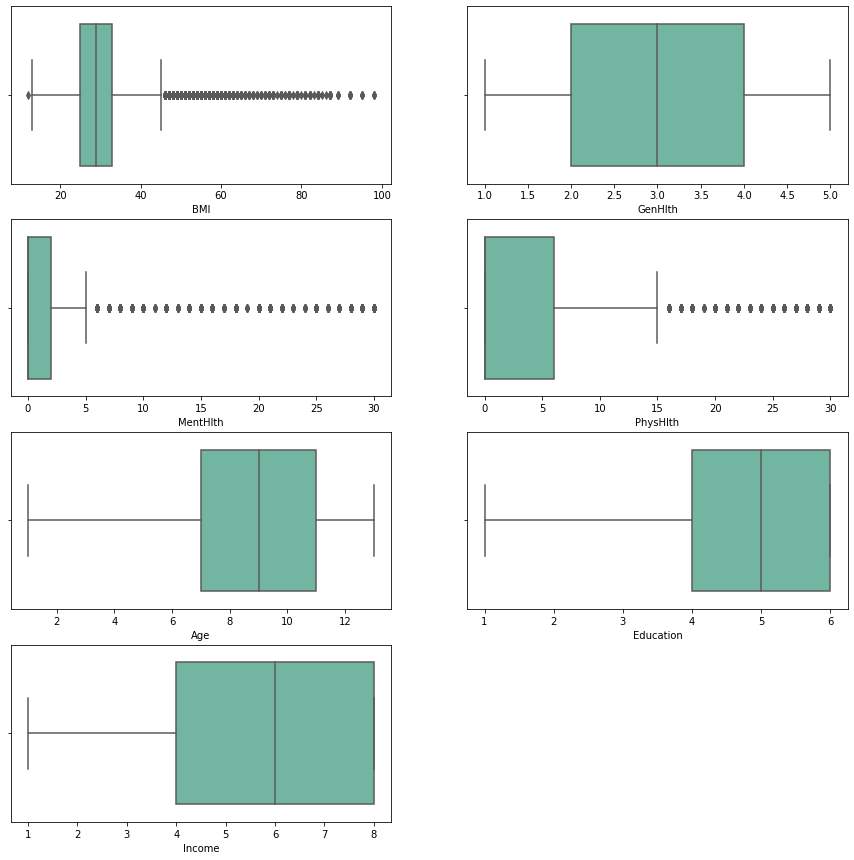

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

### Removing duplicate data samples

In [ ]:
data.duplicated().sum()

1635

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(69057, 22)

### Analyze the dataset

In [ ]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic
#adding new column Diabetes_binary_str

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [ ]:
#help us to show the categorical variable
data2 = data.copy()

In [ ]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

<ipython-input-28-19a2a2c65561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Age[data2['Age'] == 1] = '18 to 24'
<ipython-input-28-19a2a2c65561>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Age[data2['Age'] == 2] = '25 to 29'
<ipython-input-28-19a2a2c65561>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Age[data2['Age'] == 3] = '30 to 34'
<ipython-input-28-19a2a2c65561>:6: SettingWithCopyWarning: 
A value is

Text(0.5, 1.0, 'correlation of feature')

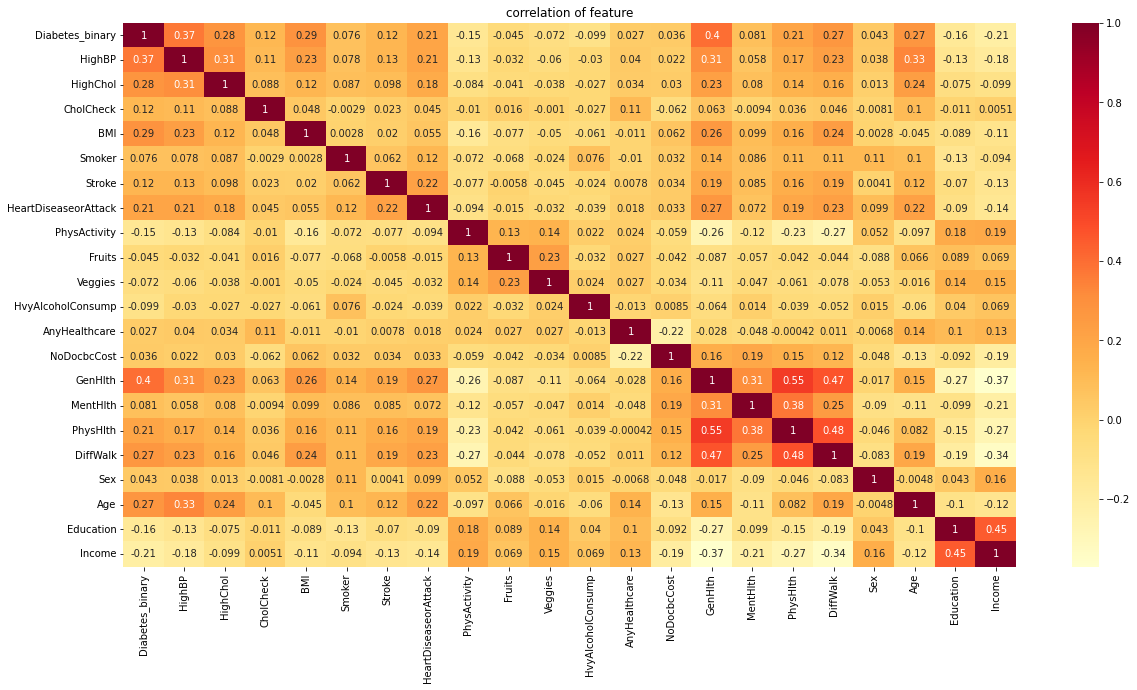

In [ ]:
#using heatmap to understand correlation better in dataset data
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

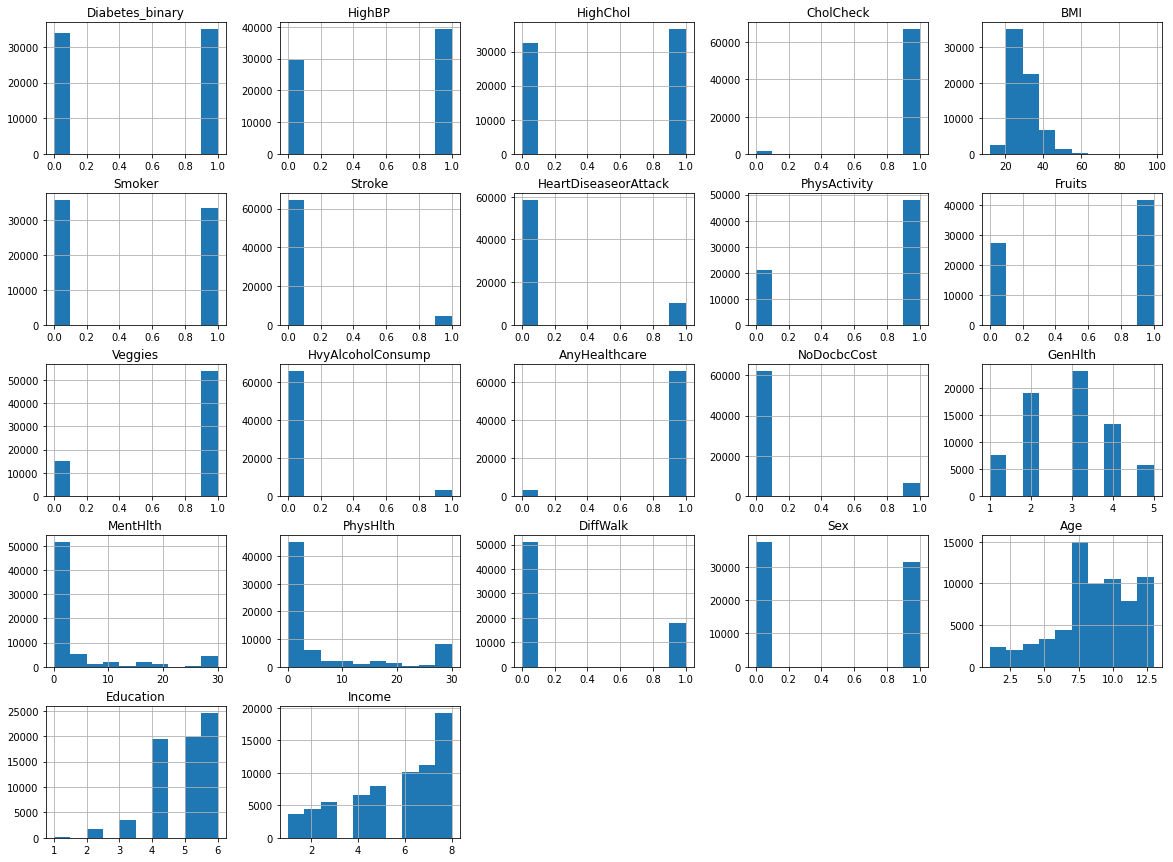

In [ ]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

In [ ]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [ ]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

### Checking the correlation between each features and the diabetes indication

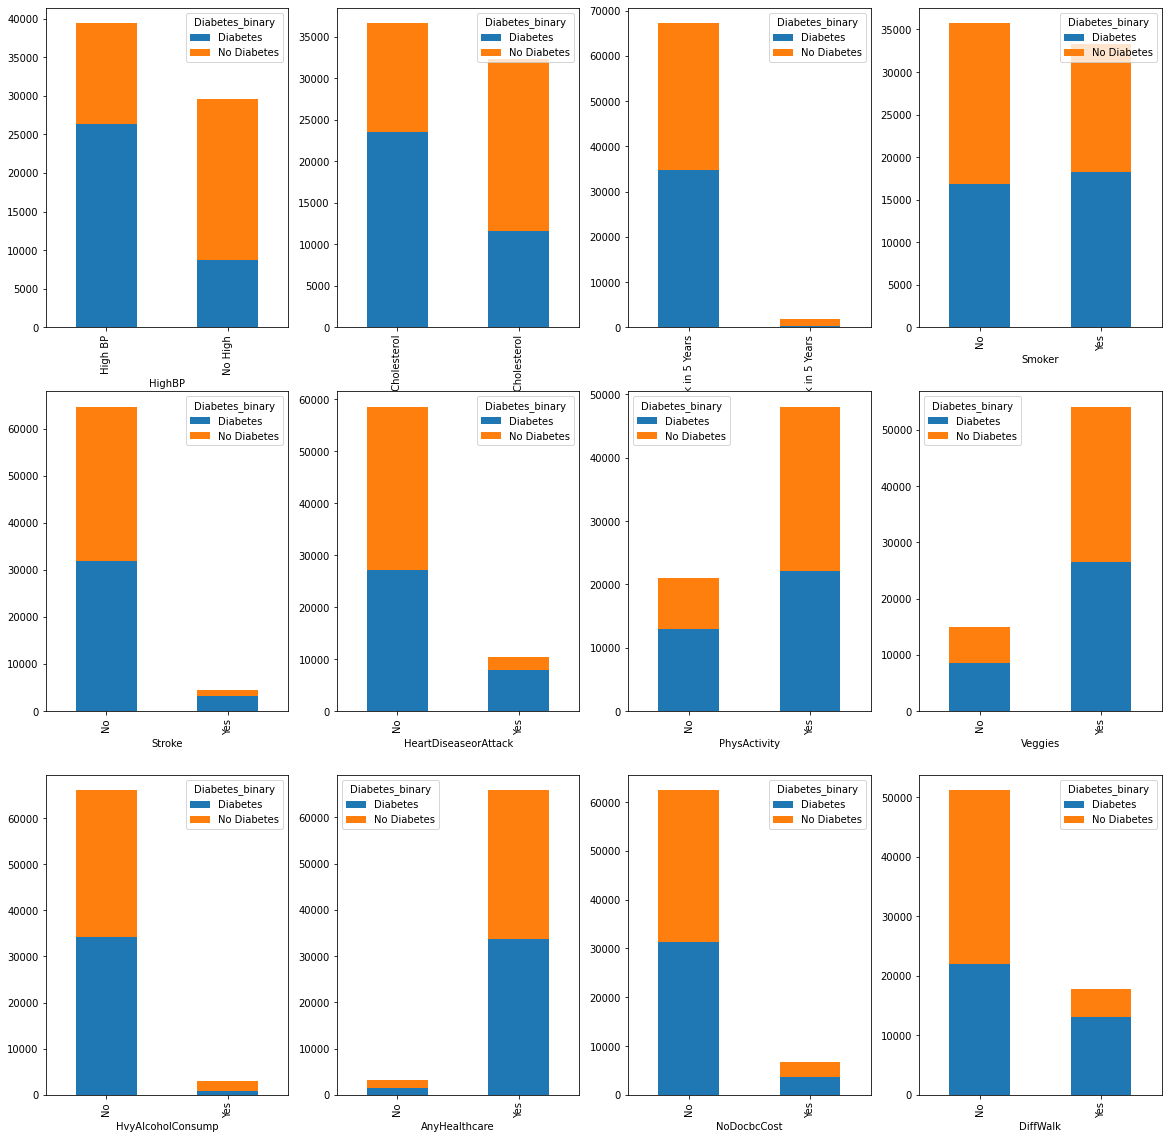

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

### Checking the balance of the data

In [ ]:
#average of column Daibetes_binary
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

Diabetes       35097
No Diabetes    33960
Name: Diabetes_binary, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


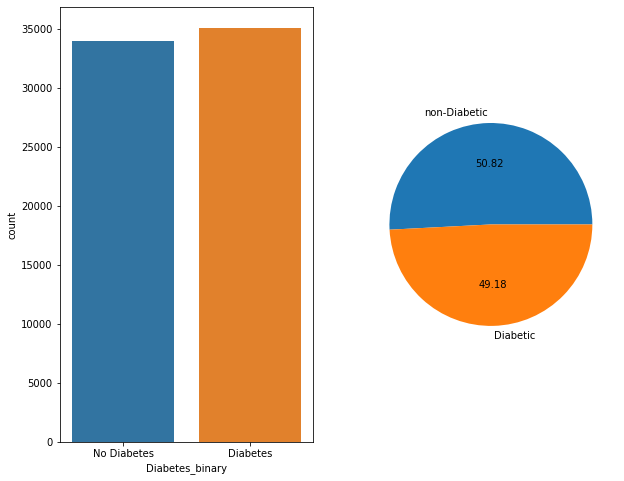

In [ ]:
#checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(data2['Diabetes_binary'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie

labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

### Correlation between Age and Diabetes

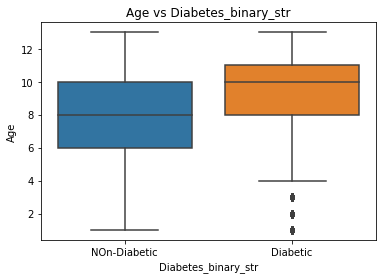

In [ ]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

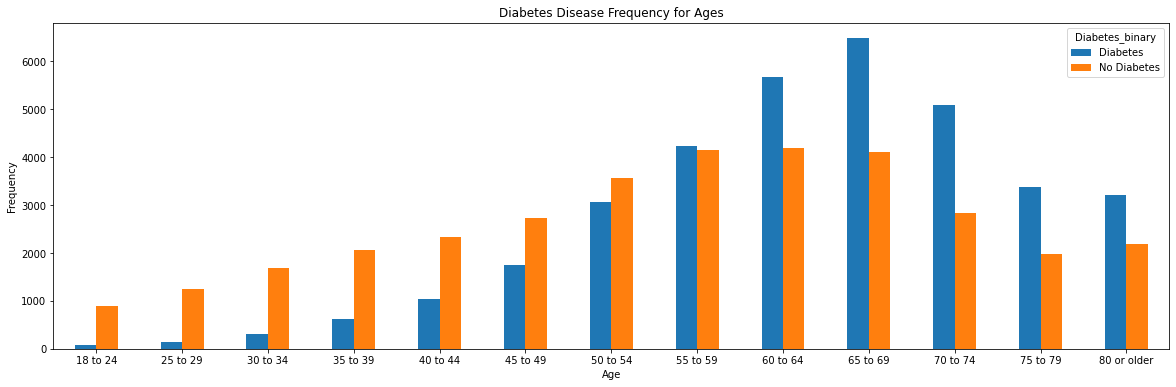

In [ ]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Correlation between Education and Diabetes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


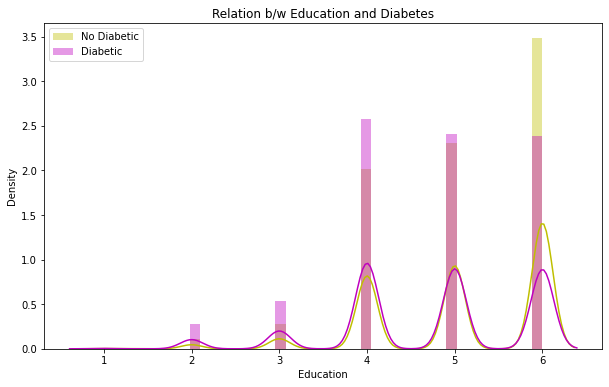

In [ ]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

### Correlation between Income and Diabetes

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 1440x720 with 0 Axes>

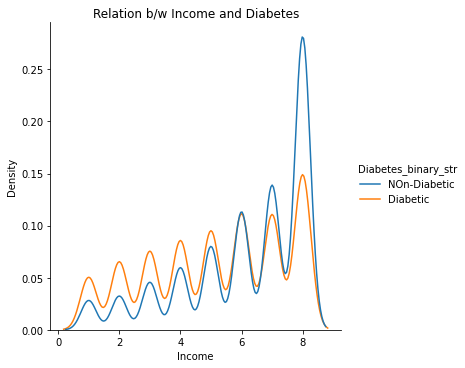

In [ ]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

### Correlation between Mental Health and Diabetes

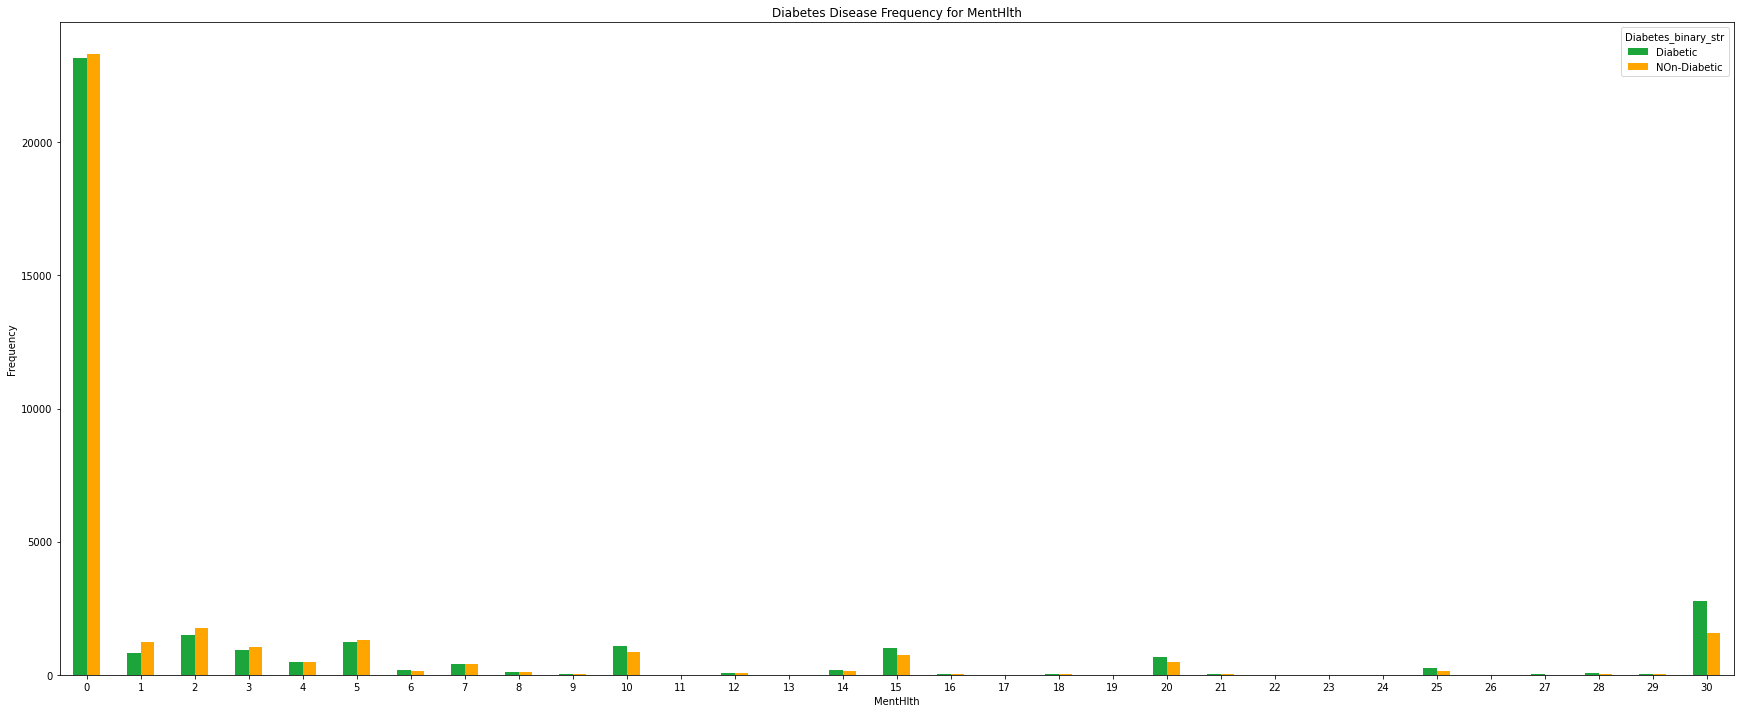

In [ ]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Correlation between Physical Health and Diabetes

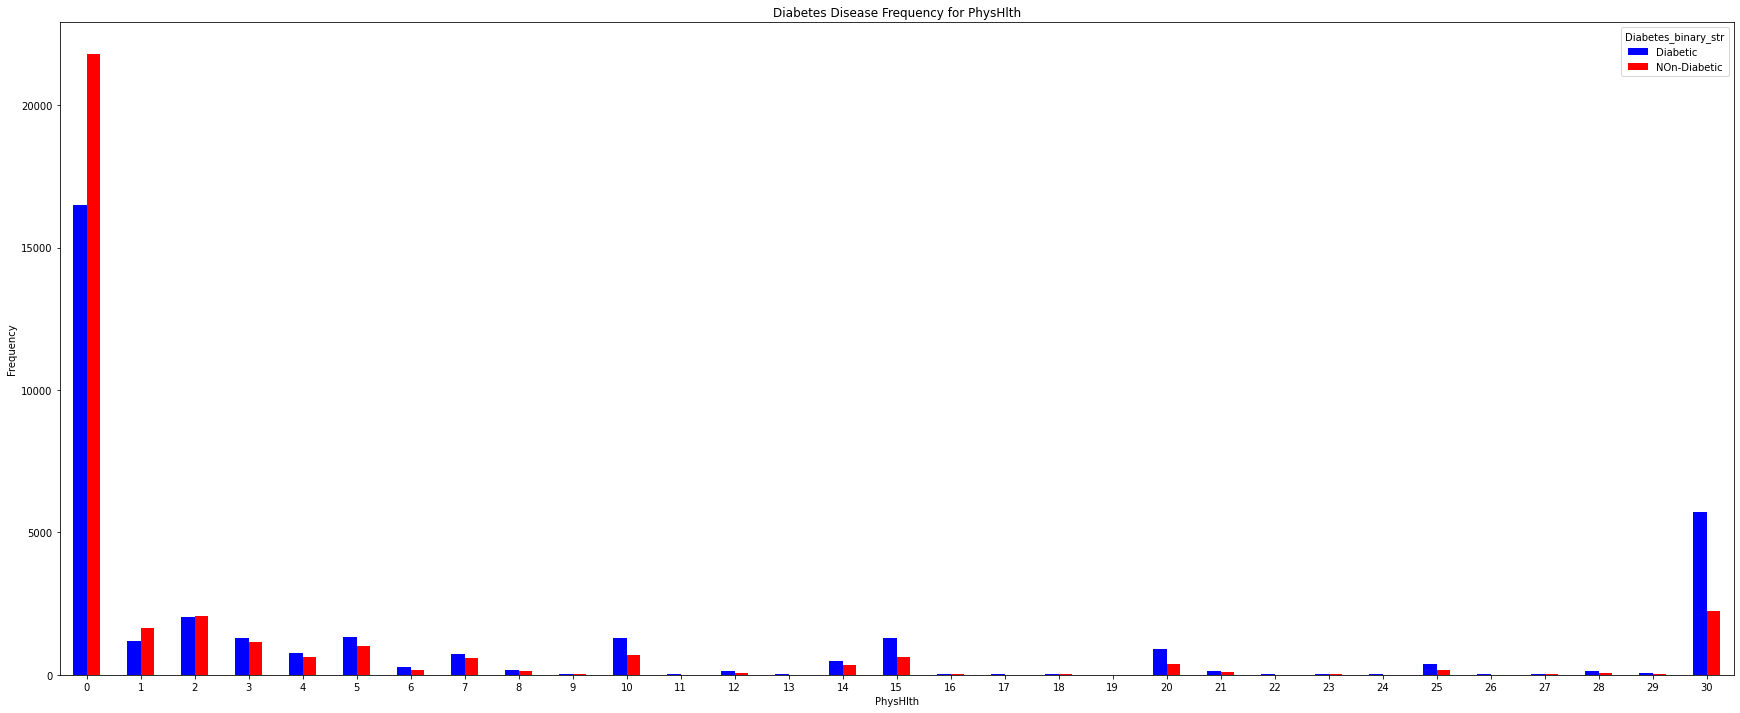

In [ ]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Correlation between General Health and Diabetes

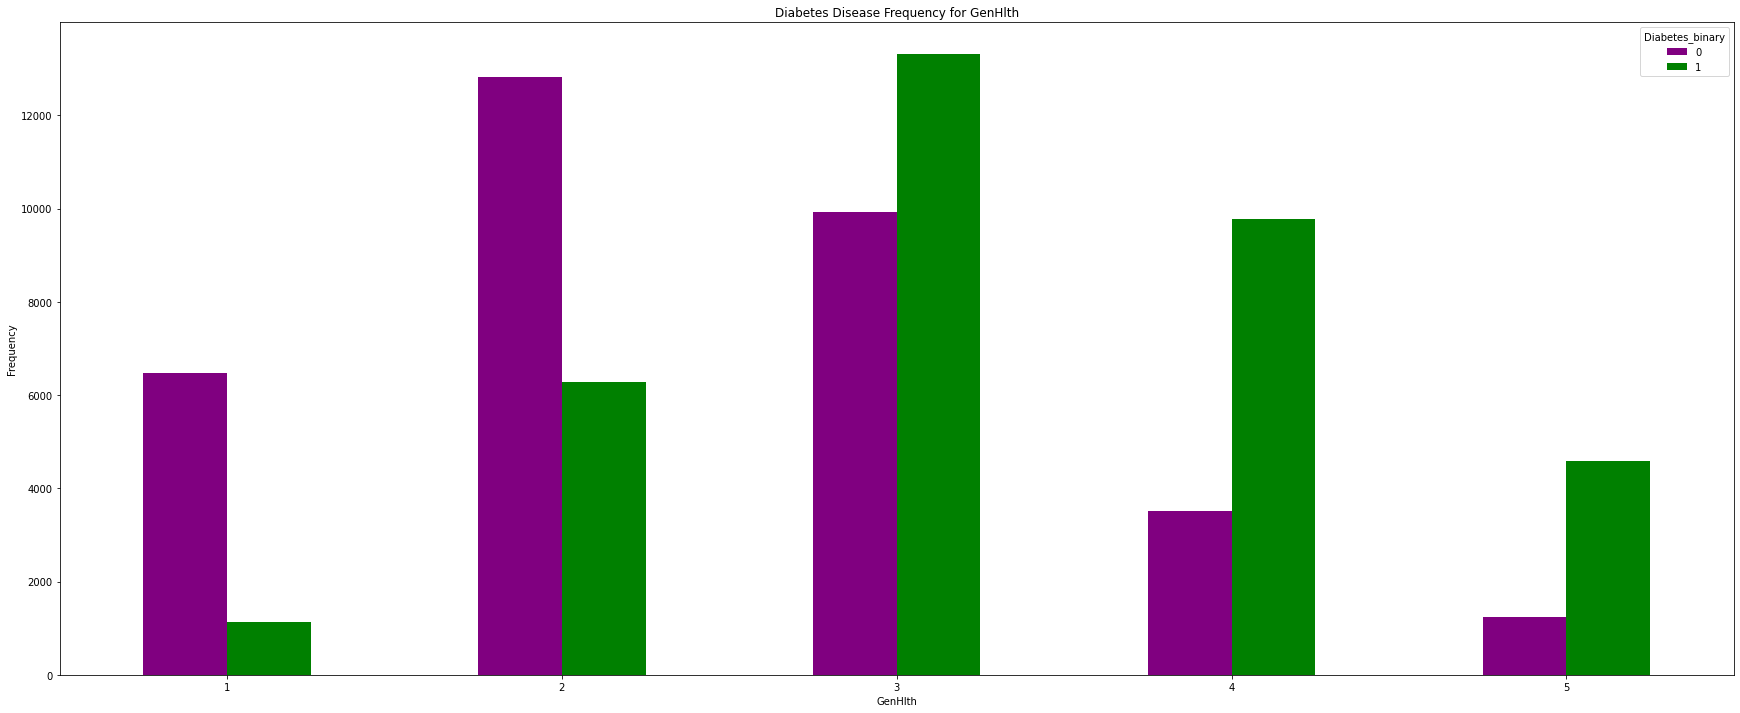

In [ ]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Preparing the data for the model

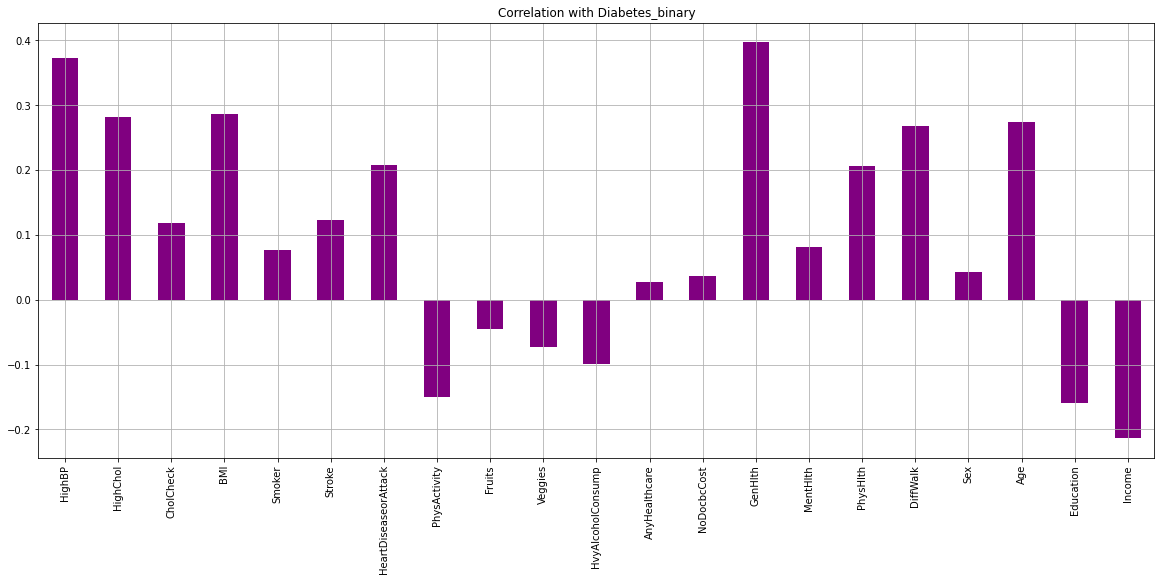

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

In [ ]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]
data.drop(colomns , axis= 1 ,inplace=True)

## Splitting the dataset and Scale them to use for the model

In [ ]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size=0.3 , random_state=42)

## Finding the Best K for the model

### K from 200 - 266

1/6 Way
2/6 Way
3/6 Way
4/6 Way
5/6 Way
6/6 Way
Maximum accuracy:- 0.7236632679856647 at K = 0


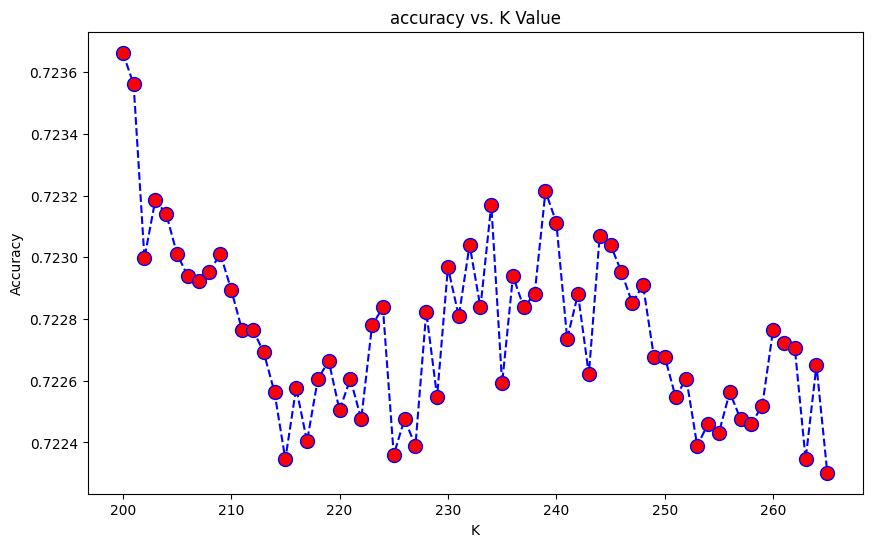

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(200,266):
    neigh = KNeighborsClassifier(n_neighbors = i, n_jobs=-1).fit(X_train, Y_train)
    yhat = np.mean(cross_val_score(neigh, X, Y, cv =5, n_jobs=-1))
    acc.append(yhat)
    if (len(acc) == 11):
        print("1/6 Way")
    if (len(acc) == 22):
        print("2/6 Way")
    if (len(acc) == 33):
        print("3/6 Way")
    if (len(acc) == 44):
        print("4/6 Way")
    if (len(acc) == 55):
        print("5/6 Way")
    if (len(acc) == 66):
        print("6/6 Way")


plt.figure(figsize=(10,6))
plt.plot(range(200,266), acc, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### K from 150 - 200

1/5 Way
2/5 Way
3/5 Way
4/5 Way


ValueError: 0.7254878334240559 is not in list

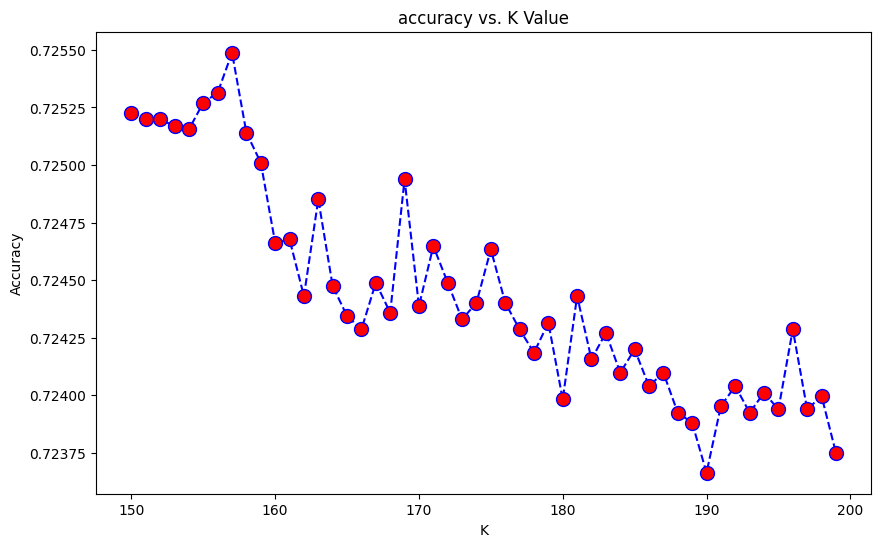

In [ ]:
acc2 = []
# Will take some time
from sklearn import metrics
for i in range(150,200):
    neigh = KNeighborsClassifier(n_neighbors = i, n_jobs=-1).fit(X_train, Y_train)
    yhat = np.mean(cross_val_score(neigh, X, Y, cv =5, n_jobs=-1))
    acc2.append(yhat)
    if (len(acc2) == 11):
        print("1/5 Way")
    if (len(acc2) == 21):
        print("2/5 Way")
    if (len(acc2) == 31):
        print("3/5 Way")
    if (len(acc2) == 41):
        print("4/5 Way")
    if (len(acc2) == 51):
        print("5/5 Way")


Maximum accuracy:- 0.7254878334240559 at K = 7


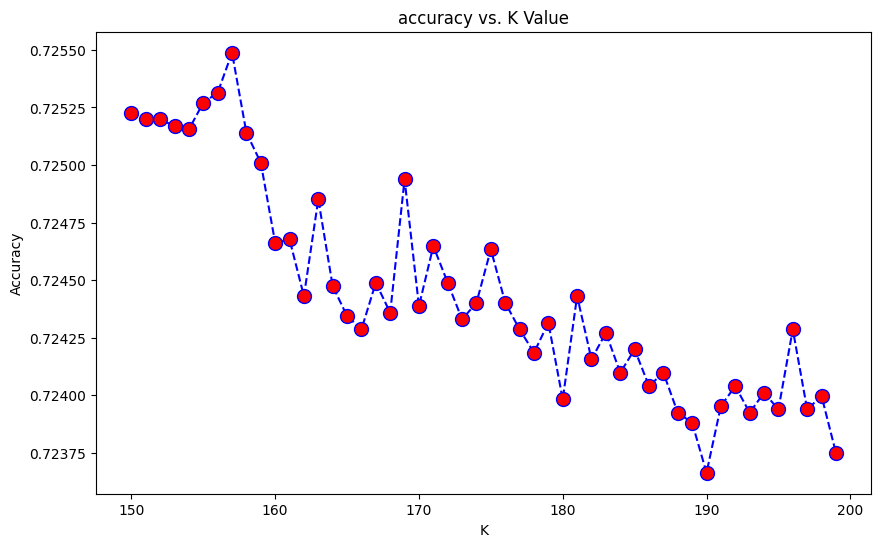

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(150,200), acc2, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc2),"at K =",acc2.index(max(acc2)))

### K from 100 - 150

1/5 Way
2/5 Way
3/5 Way
4/5 Way
Maximum accuracy:- 0.7262408553283233 at K = 12


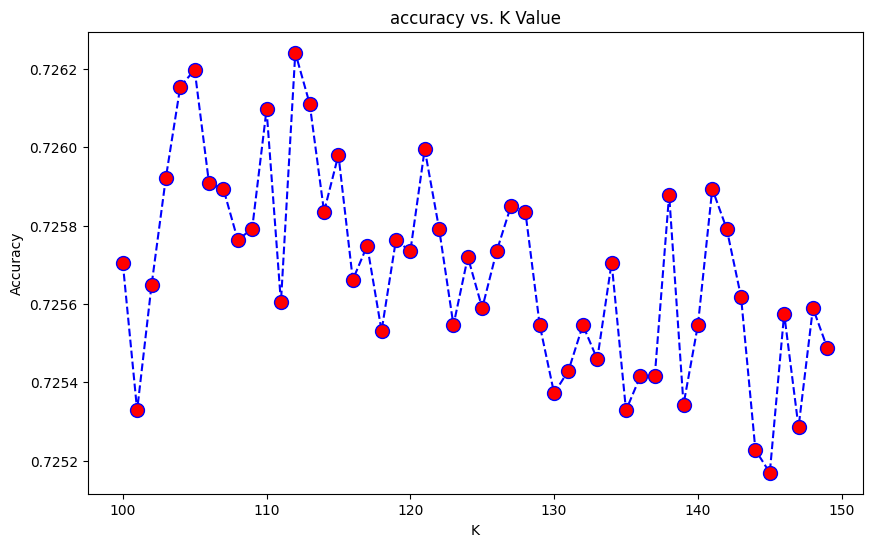

In [ ]:
acc3 = []
# Will take some time
from sklearn import metrics
for i in range(100,150):
    neigh = KNeighborsClassifier(n_neighbors = i, n_jobs=-1).fit(X_train, Y_train)
    yhat = np.mean(cross_val_score(neigh, X, Y, cv =5, n_jobs=-1))
    acc3.append(yhat)
    if (len(acc3) == 11):
        print("1/5 Way")
    if (len(acc3) == 21):
        print("2/5 Way")
    if (len(acc3) == 31):
        print("3/5 Way")
    if (len(acc3) == 41):
        print("4/5 Way")
    if (len(acc3) == 51):
        print("5/5 Way")


plt.figure(figsize=(10,6))
plt.plot(range(100,150), acc3, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc3),"at K =",acc3.index(max(acc3)))

### K from 50 - 100

1/5 Way
2/5 Way
3/5 Way
4/5 Way
Maximum accuracy:- 0.7271965649041842 at K = 27


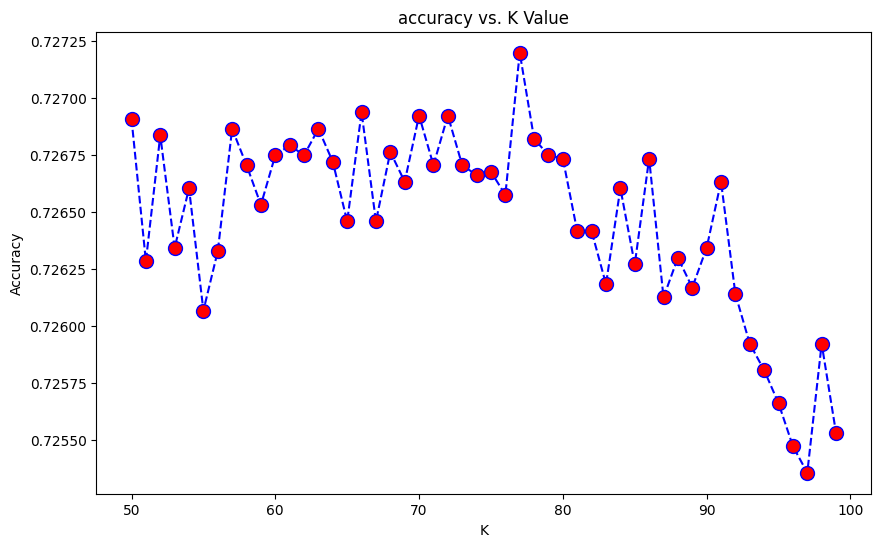

In [ ]:
acc4 = []
# Will take some time
from sklearn import metrics
for i in range(50,100):
    neigh = KNeighborsClassifier(n_neighbors = i, n_jobs=-1).fit(X_train, Y_train)
    yhat = np.mean(cross_val_score(neigh, X, Y, cv =5, n_jobs=-1))
    acc4.append(yhat)
    if (len(acc4) == 11):
        print("1/5 Way")
    if (len(acc4) == 21):
        print("2/5 Way")
    if (len(acc4) == 31):
        print("3/5 Way")
    if (len(acc4) == 41):
        print("4/5 Way")
    if (len(acc4) == 51):
        print("5/5 Way")


plt.figure(figsize=(10,6))
plt.plot(range(50,100), acc4, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc4),"at K =",acc4.index(max(acc4)))

### K from 1 - 49

1/5 Way
2/5 Way
3/5 Way
4/5 Way
Maximum accuracy:- 0.7274716680649862 at K = 47


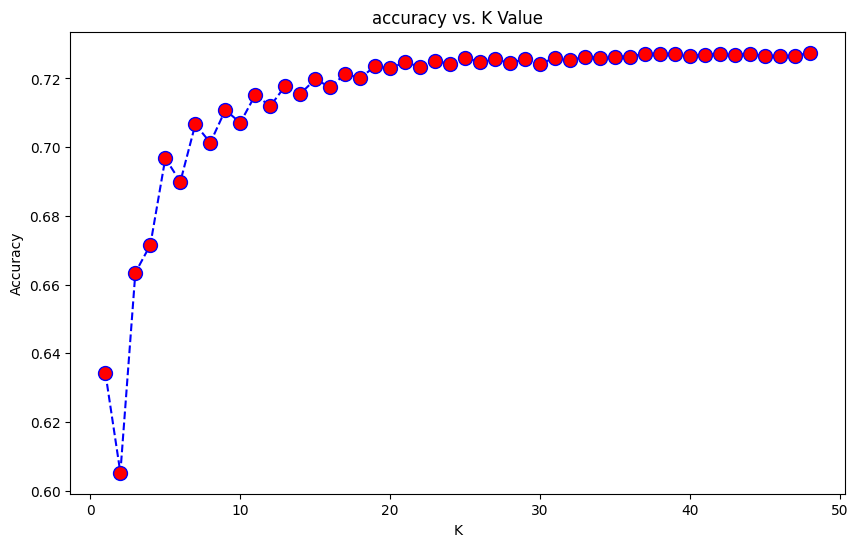

In [ ]:
acc5 = []
# Will take some time
from sklearn import metrics
for i in range(1,49):
    neigh = KNeighborsClassifier(n_neighbors = i, n_jobs=-1).fit(X_train, Y_train)
    yhat = np.mean(cross_val_score(neigh, X, Y, cv =5, n_jobs=-1))
    acc5.append(yhat)
    if (len(acc5) == 11):
        print("1/5 Way")
    if (len(acc5) == 21):
        print("2/5 Way")
    if (len(acc5) == 31):
        print("3/5 Way")
    if (len(acc5) == 41):
        print("4/5 Way")
    if (len(acc5) == 49):
        print("5/5 Way")


plt.figure(figsize=(10,6))
plt.plot(range(1,49), acc5, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc5),"at K =",acc5.index(max(acc5)))

# The Best K value is at K = 48, so we will use K = 48 and hypertune the other paramters. (K = 48 with K-Fold value of 5 is 0.727)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
baseNeigh = KNeighborsClassifier(n_neighbors=48)
baseNeigh.fit(X_train, Y_train)
y_pred = baseNeigh.predict(X_test)

# Accuracy Score
print('Model accuracy: ', accuracy_score(Y_test, y_pred))

#F1 Score
print('F1 Score : ', f1_score(Y_test, y_pred))

Model accuracy:  0.7304276474563182
F1 Score :  0.7445923080440847


# Manually tuning the hyperparameters

## Cosine Distance

Training set score: 0.7281
Test set score: 0.7175
Model accuracy:  0.7178419072857369
F1 Score :  0.7421572083186465


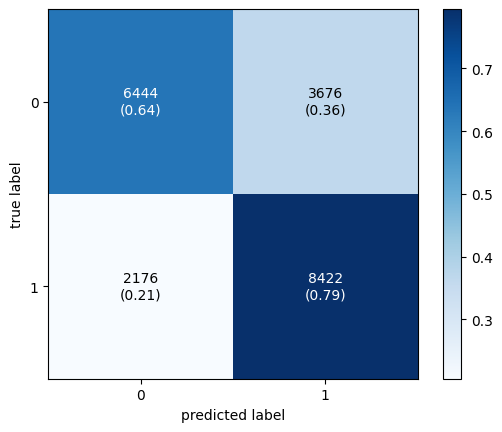

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='cosine', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.9860
Test set score: 0.7119
Model accuracy:  0.7088928231677898
F1 Score :  0.7391152299353034


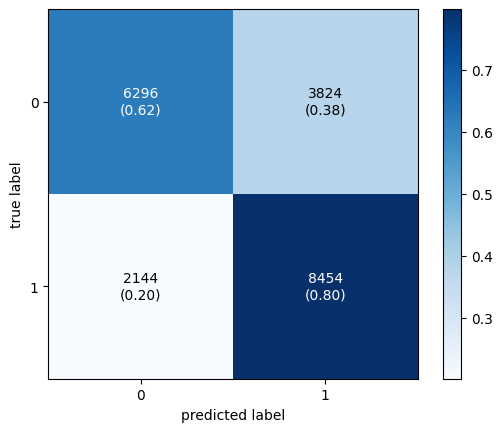

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='cosine', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Cityblock Distance

Training set score: 0.9860
Test set score: 0.7278
Model accuracy:  0.7256760377881173
F1 Score :  0.7449348769898696


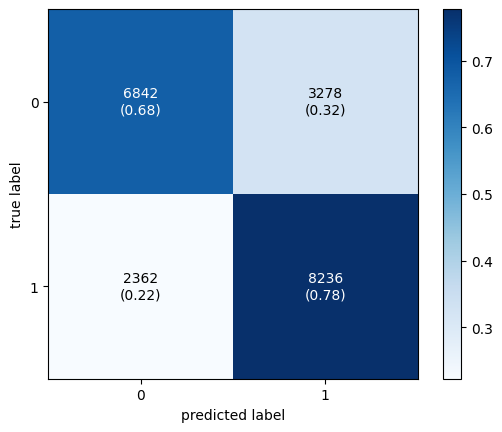

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='cityblock', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.7417
Test set score: 0.7357
Model accuracy:  0.733394246262318
F1 Score :  0.749473876841431


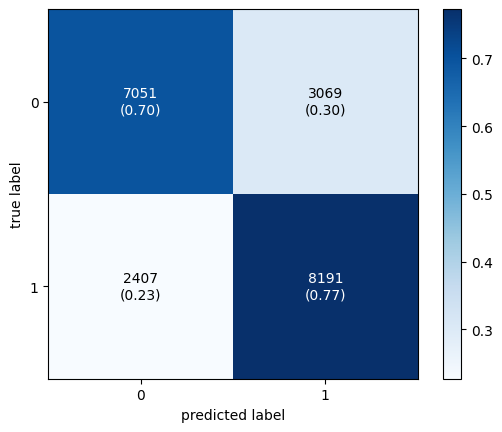

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='cityblock', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## L1 Distance

Training set score: 0.7417
Test set score: 0.7357
Model accuracy:  0.733394246262318
F1 Score :  0.749473876841431


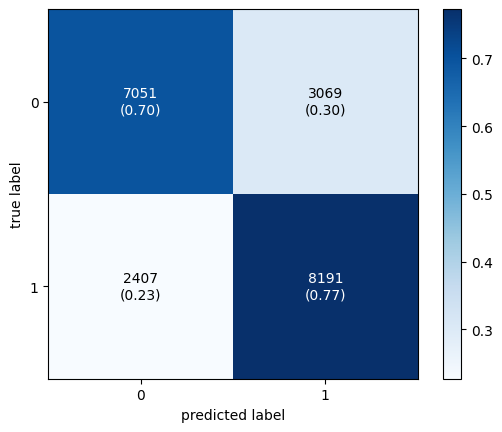

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='l1', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.9860
Test set score: 0.7278
Model accuracy:  0.7256760377881173
F1 Score :  0.7449348769898696


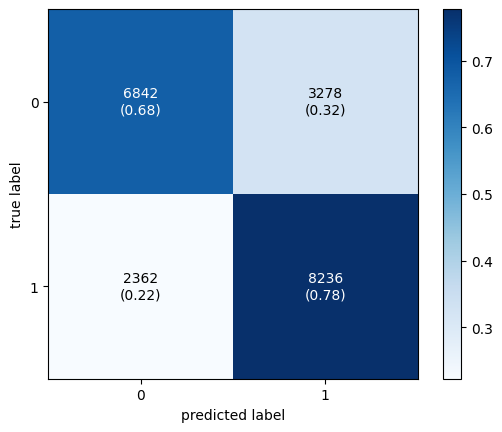

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='l1', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## L2 Distance

Training set score: 0.9860
Test set score: 0.7254
Model accuracy:  0.7193914135982846
F1 Score :  0.7434394444945441


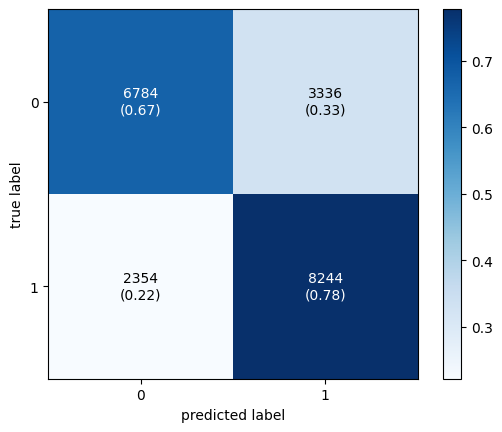

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='l2', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.7369
Test set score: 0.7304
Model accuracy:  0.7274716680649862
F1 Score :  0.7445923080440847


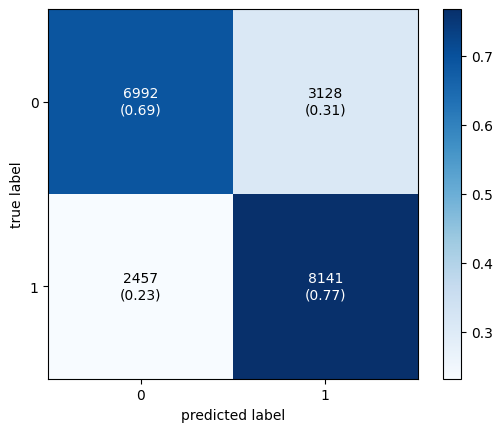

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='l2', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Nan_Euclidean Distance

Training set score: 0.7369
Test set score: 0.7304
Model accuracy:  0.7274716680649862
F1 Score :  0.7445923080440847


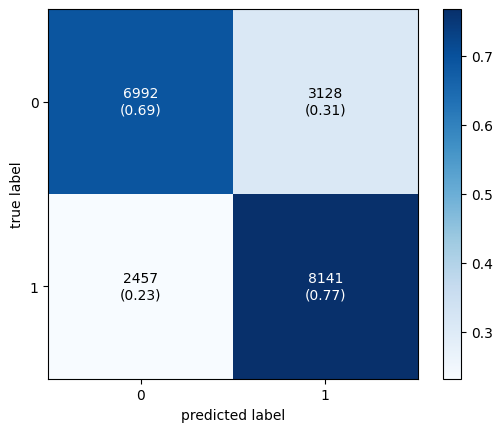

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='nan_euclidean', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.9860
Test set score: 0.7254
Model accuracy:  0.7193914135982846
F1 Score :  0.7434394444945441


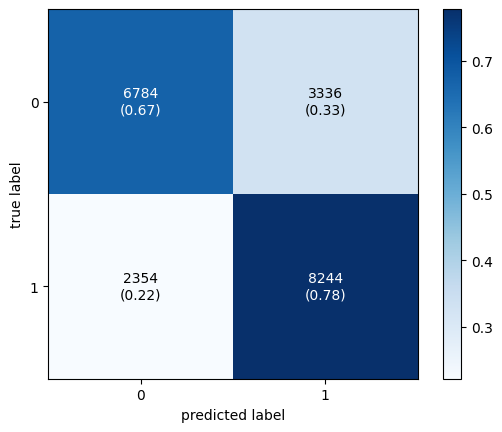

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='nan_euclidean', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Manhattan Distance

Training set score: 0.9860
Test set score: 0.7278
Model accuracy:  0.7256760377881173
F1 Score :  0.7449348769898696


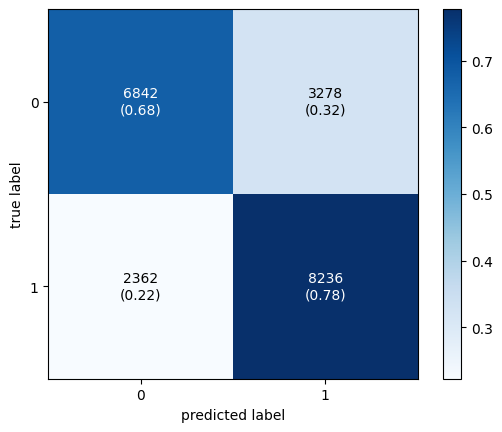

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='manhattan', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.7417
Test set score: 0.7357
Model accuracy:  0.733394246262318
F1 Score :  0.749473876841431


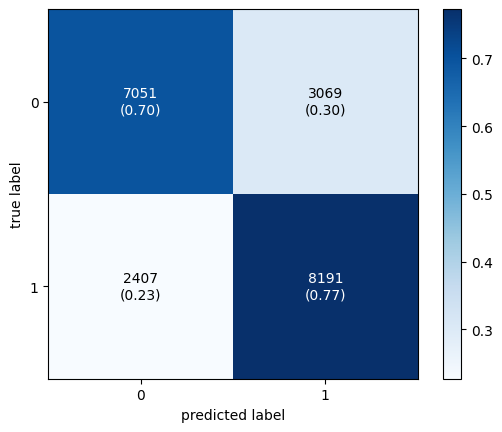

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='manhattan', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Minkowski Distance

Training set score: 0.7369
Test set score: 0.7304
Model accuracy:  0.7274716680649862
F1 Score :  0.7445923080440847


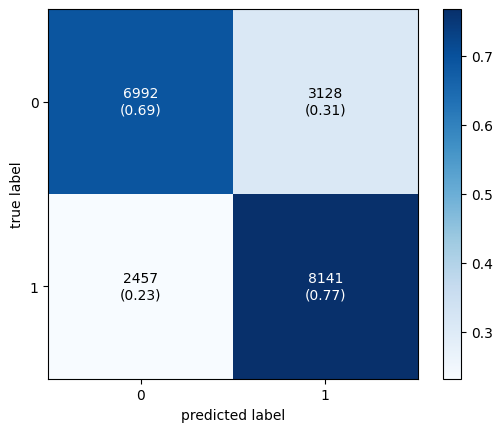

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='minkowski', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.9860
Test set score: 0.7254
Model accuracy:  0.7193914135982846
F1 Score :  0.7434394444945441


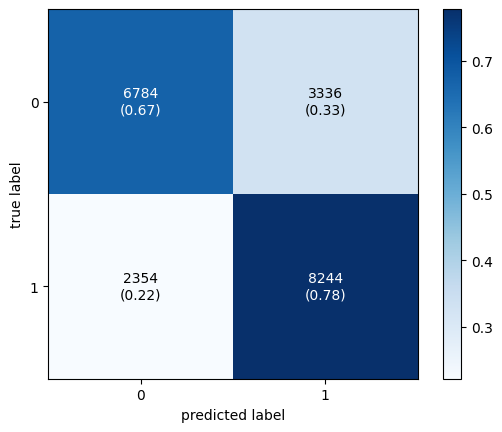

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='minkowski', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.9860
Test set score: 0.7278
Model accuracy:  0.7256760377881173
F1 Score :  0.7449348769898696


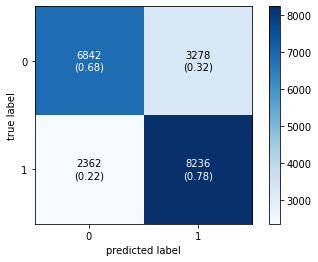

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='minkowski', p=1, n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.7417
Test set score: 0.7357
Model accuracy:  0.733394246262318
F1 Score :  0.749473876841431


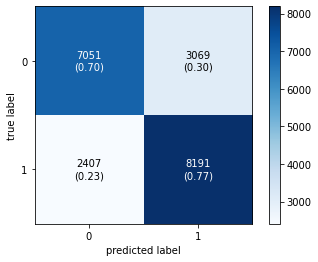

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='minkowski', p=1, n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Euclidean Distance

Training set score: 0.9860
Test set score: 0.7254
Model accuracy:  0.7193914135982846
F1 Score :  0.7434394444945441


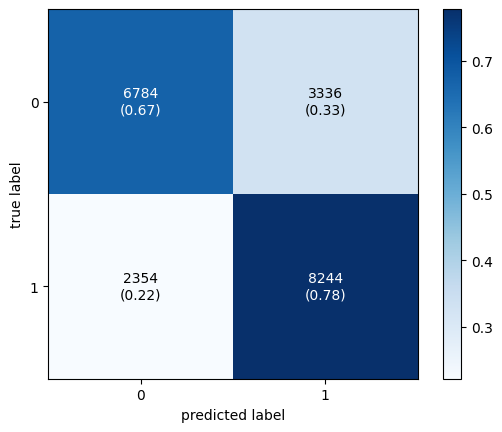

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='euclidean', n_jobs=-1, weights='distance')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Training set score: 0.7369
Test set score: 0.7304
Model accuracy:  0.7274716680649862
F1 Score :  0.7445923080440847


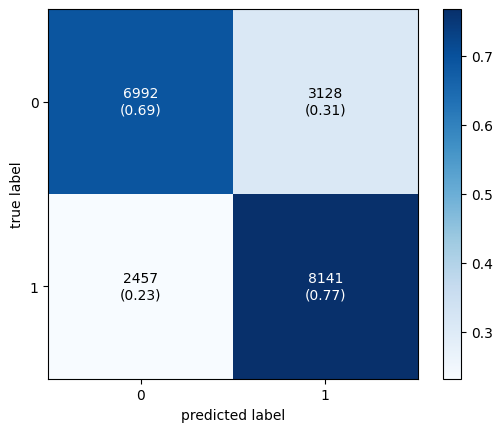

In [ ]:
testNeigh = KNeighborsClassifier(n_neighbors=48, metric='euclidean', n_jobs=-1, weights='uniform')
testNeigh.fit(X_train , Y_train)
# make predictions on test set
y_pred_base = testNeigh.predict(X_test)

print('Training set score: {:.4f}'.format(testNeigh.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(testNeigh.score(X_test, Y_test)))

scores_base = cross_val_score(testNeigh, X, Y, cv =5, n_jobs=-1)
print('Model accuracy: ',np.mean(scores_base))
print('F1 Score : ', f1_score(Y_test, y_pred_base))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred_base)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Grid Search to find the best parameters

In [ ]:
grid_params = { 'n_neighbors' : [48],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan', 'cityblock', 'cosine','l2','l1']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs = -1, verbose = 3)

In [ ]:
g_res = gs.fit(X_train, Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [ ]:
optimal_knn = g_res.best_estimator_
optimal_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=48)

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 48, 'weights': 'uniform'}

In [ ]:
print('Test set score: {:.4f}'.format(optimal_knn.score(X_test, Y_test)))

Test set score: 0.7357


### Refitting the new found parameter to test if they are actually tuned

In [ ]:
refit_neigh = KNeighborsClassifier(n_neighbors = 48, metric = 'manhattan', weights = 'uniform').fit(X_train, Y_train)
accuracy = np.mean(cross_val_score(refit_neigh, X, Y, scoring='accuracy', cv =5, n_jobs=-1))
f1 = np.mean(cross_val_score(refit_neigh, X, Y, scoring='f1', cv =5, n_jobs=-1))

In [ ]:
y_pred_tts = refit_neigh.predict(X_test)

# Accuracy Score
print('Model accuracy: ', accuracy_score(Y_test, y_pred_tts))

#F1 Score
print('F1 Score : ', f1_score(Y_test, y_pred_tts))

Model accuracy:  0.7356887730475915
F1 Score :  0.749473876841431


In [ ]:
accuracy

0.733394246262318

In [ ]:
f1

0.7472509282392539